# Examples of loss functions (fig. 2.1)
## Author: Anna Dawid

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
# Import custom font
import matplotlib.font_manager as fm

path = r'..\fonts\Hero New Regular.otf' # for text only
path_abc = r'..\fonts\Hero New Medium.otf' # for (a), (b), etc.
custom_font = fm.FontProperties(fname=path)
custom_font_abc = fm.FontProperties(fname=path_abc)

In [8]:
# Import colors (e.g., as 1D and dictionary)
import pickle

# Use colors as a dictionary
infile = open('..\colors\colors_dict.pkl','rb')
colors_dict = pickle.load(infile)
infile.close()

In [9]:
# Seaborn style set
sns.set(style="whitegrid", rc={'figure.figsize':(12,3.375)}) # in inches
sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.5", 'axes.edgecolor': '.1'})

C:\Users\ankad\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\ankad\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
'Hero New Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'Hero New Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonU

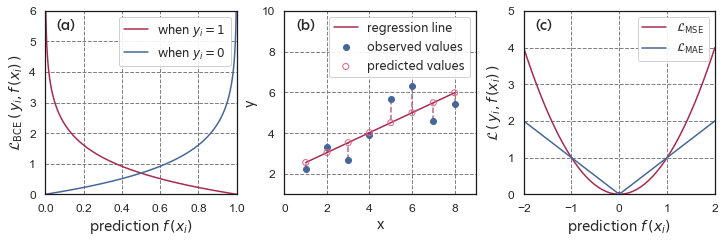

In [10]:
np.random.seed(3)
x = np.linspace(1,8,8)
y = 0.6*x + 3*np.random.random(len(x))

x_log = np.linspace(0,1,1000)
x2 = np.linspace(-2,2,50)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1, 1), y)

fig, axs = plt.subplots(1,3)
axs[0].plot(x_log, -np.log(x_log), color=colors_dict["purple"]["dark"], label="when $y_i=1$")
axs[0].plot(x_log, -np.log(1-x_log), color=colors_dict["blue"]["dark"], label="when $y_i=0$")

axs[0].set_xlim(0,1)
axs[0].set_ylim(0,6)
axs[0].set_xlabel(r"prediction $f\,(x_i)$", size=14, fontproperties=custom_font)
axs[0].set_ylabel(r"$\mathcal{L}_{\mathrm{BCE}}\,(\,y_i,f\,(x_i)\,)$", size=14, fontproperties=custom_font)
axs[0].legend(fontsize = 10, framealpha = 0.9, prop=fm.FontProperties(fname=path, size=12))

axs[1].scatter(x, y, color=colors_dict["blue"]["dark"], label="observed values", zorder=2)
axs[1].plot(x, reg.predict(x.reshape(-1, 1)), color=colors_dict["purple"]["dark"], label="regression line", zorder=3)
axs[1].scatter(x, reg.predict(x.reshape(-1, 1)), facecolors='none', edgecolors=colors_dict["purple"]["light"], label="predicted values", zorder=4)

for i, xi in enumerate(x):
    axs[1].plot([xi,xi],[y[i],reg.predict(xi.reshape(-1, 1))], "--", color=colors_dict["purple"]["medium"], zorder=1)

axs[1].set_xlim(0,9)
axs[1].set_ylim(1,10)
axs[1].set_xlabel("x", size=14, fontproperties=custom_font)
axs[1].set_ylabel("y", size=14, fontproperties=custom_font)
axs[1].legend(fontsize = 10, framealpha = 0.9, prop=fm.FontProperties(fname=path, size=12))

axs[2].plot(x2, x2**2, color=colors_dict["purple"]["dark"], label=r"$\mathcal{L}_{\mathrm{MSE}}$")
axs[2].plot(x2, np.abs(x2), color=colors_dict["blue"]["dark"], label=r"$\mathcal{L}_{\mathrm{MAE}}$")

axs[2].set_xlim(-2,2)
axs[2].set_ylim(0,5)
axs[2].set_xlabel(r"prediction $f\,(x_i)$", size=14, fontproperties=custom_font)
axs[2].set_ylabel(r"$\mathcal{L}\,(\,y_i,f\,(x_i)\,)$", size=14, fontproperties=custom_font)
axs[2].legend(fontsize = 10, framealpha = 0.9, prop=fm.FontProperties(fname=path, size=12))

for i, letter in enumerate(["(a)","(b)","(c)"]):
    axs[i].text(0.06, 0.9, letter, fontsize=14, fontproperties=custom_font_abc,transform=axs[i].transAxes)

for i in range(3):
    axs[i].tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.25)

fig.savefig('fig-2.1.pdf', bbox_inches='tight')